In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA 

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



#### Data

The data for this analysis is from a direct marketing campaign from a Portguese Bank. Clients were called and offered a term deposit product.

Link: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
#Import Data
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

In [3]:
#There are 41,188 rows and 21 columns.
data.shape

(41188, 21)

In [4]:
# See column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [209]:
#See first 5 rows of data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome_cont,Previous Contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0


In [6]:
#Descriptive statistics for the numerical columns
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [152]:
#Count values for outcome.
outcome = data["y"]
outcome.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Baseline is 88.8%.

There does appear to be a class imblanace issue, but there are more than 10% of the minority class so we can proceed at this point and revisit if there is an issue during modeling. Target class is the minority, yes.  This indicates that the customer made a purchase.

In [156]:
bank_data = data.loc[:,"age":"poutcome"]

In [203]:
bank_data["outcome_cont"] = np.where(data["y"] == "yes",1,0)
data["outcome_cont"] = np.where(data["y"] == "yes",1,0)
data["Previous Contact"] = np.where(data["pdays"] == 999,0,1)

In [159]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,outcome_cont
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,0


UCI provided two data sets, one with bank only information, and a second including macroeconomic information.  This analysis will be performed on the full dataset, but for looking at correlation a separate set of data will be created with bank information only.

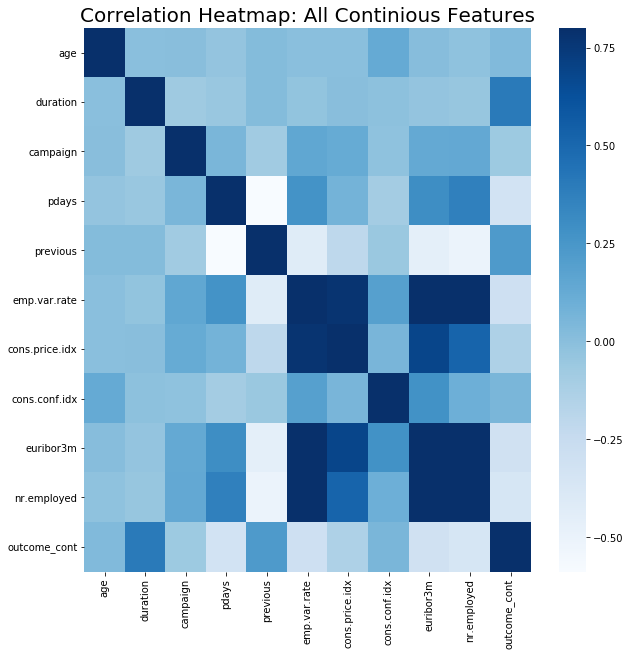

In [188]:
full_corrmat = data.corr()

f, ax =plt.subplots(figsize=(10,10))
#sns.heatmap(full_corrmat,vmax=.8, cmap="Blues")
plt.title("Correlation Heatmap: All Continious Features",size=20)  
sns_plot = sns.heatmap(full_corrmat,vmax=.8, cmap="Blues")
fig = sns_plot.get_figure()
fig.savefig("output1.png")

We observe high correlation for the macroeconomic factors which is to be expected.

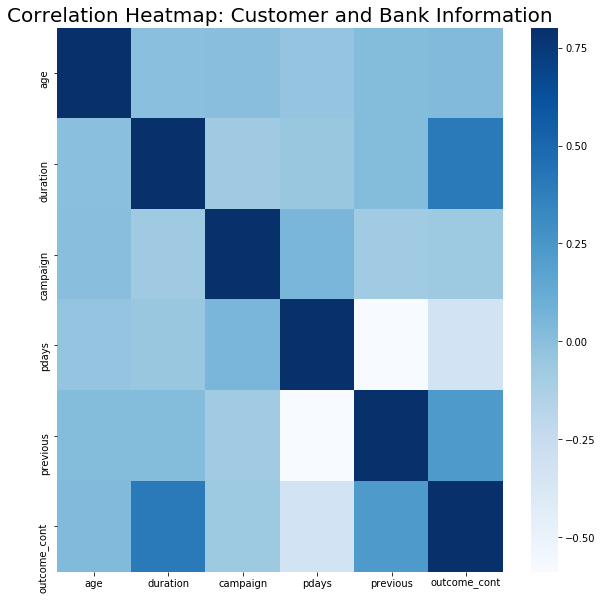

In [187]:
bank_corrmat = bank_data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns_plot = sns.heatmap(bank_corrmat,vmax=.8, cmap="Blues")
plt.title("Correlation Heatmap: Customer and Bank Information",size=20)  
fig = sns_plot.get_figure()
fig.savefig("output2.png")

Looking only at a dataset with the bank information there doesn't appear to be any correlations we should be concerned about at this point.  Now we can start to dig in to the data, looking first at a boxplot of the ages of customers.

Text(0.5,1,'Age of Campaign Customers')

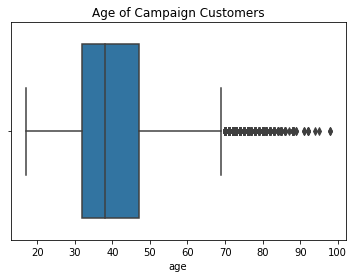

In [25]:
sns.boxplot(x="age", data=data)
plt.title("Age of Campaign Customers")

It looks like the lower range is just below twenty and there are several outliers above 70.  The median customer is just below 40 years old.  Now let's look at the education levels of customers.

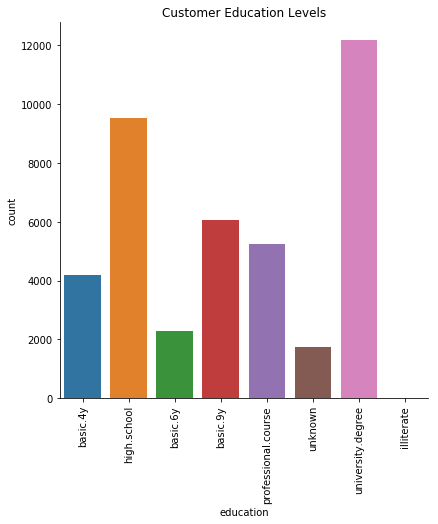

In [12]:
sns.factorplot(x="education", data=data, kind="count", size=6)
plt.title("Customer Education Levels")
plt.xticks(rotation=90)
plt.show()

The education level with the most customers is University, followed by High School, then basic.9y.  The material provided by UCI doesn't go in to detail as to what the basic.#y format for education means.  A quick Google search shows a reference to 4th and 6th grades being important markers in Portugese education.  If needed this may be researched further if education becomes an important feature.  Let's now lookat what kind of jobs the customers have.

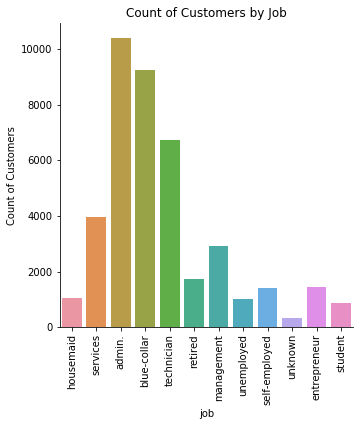

In [13]:
sns.factorplot(x="job", data=data, kind="count", size=5)
plt.title("Count of Customers by Job")
plt.ylabel("Count of Customers")
plt.xticks(rotation=90)
plt.show()

Most customers contacted have administrative jobs, followed by blue-collar and technicians.  Now let's look at how often customers were contacted, divided by whether they purchased or not.

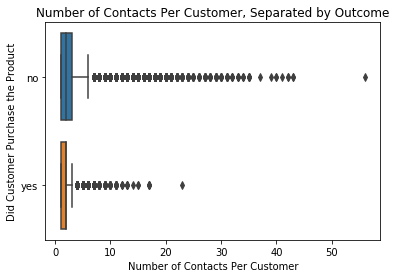

In [14]:
sns.boxplot(x="campaign", y="y", data=data)
plt.title("Number of Contacts Per Customer, Separated by Outcome")
plt.ylabel("Did Customer Purchase the Product")
plt.xlabel("Number of Contacts Per Customer")
plt.show()

It looks like most customers have just a handful of contacts, whether they purchase the product or not.  But there are some outliers, including one with more than 50 contacts for a customer that did not purchase the product, and more than 20 for one that did. Let's filter out those with more than 10 contacts so we get a better idea.

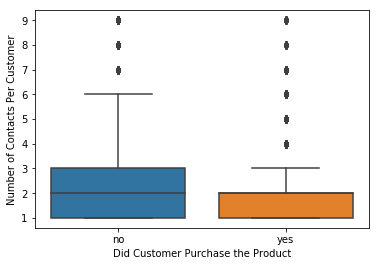

In [37]:
campaign_less_than_10 = data.loc[data["campaign"] <10]
sns.boxplot(x="y", y="campaign", data=campaign_less_than_10)
#Rename labels to purchase or not purchase
plt.xlabel("Did Customer Purchase the Product")
plt.ylabel("Number of Contacts Per Customer")
plt.show()

It looks like most customers who purchase are contacted less than two times.  Let's look at how many days it's been since each customer has been contacted prior to this campaign.

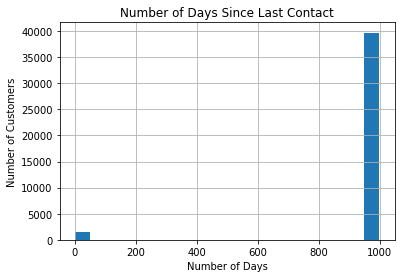

In [28]:
data.hist(column="pdays", bins=20)
plt.title("Number of Days Since Last Contact")
plt.xlabel("Number of Days")
plt.ylabel("Number of Customers")
plt.show()

For customers who haven't been previously contacted they are coded as 999, so most customers have not been previously contacted in a marketing campaign.  For those that have been previously contacted let's see how many days it's been since they've been previously contacted.

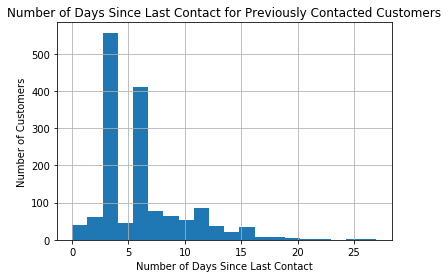

In [17]:
pdays_less_than_999 = data.loc[data["pdays"]<999]
pdays_less_than_999.hist(column="pdays", bins=20)
plt.title("Number of Days Since Last Contact for Previously Contacted Customers")
plt.xlabel("Number of Days Since Last Contact")
plt.ylabel("Number of Customers")
plt.show()

Let's now look at how likely those customers were to purchase this time.

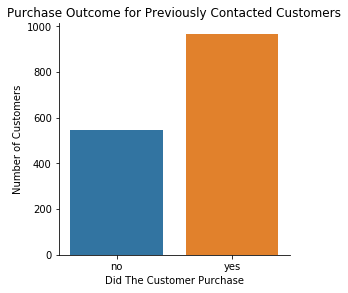

In [29]:
sns.factorplot(x="y", data=pdays_less_than_999, kind="count", size=4)
plt.title("Purchase Outcome for Previously Contacted Customers")
plt.xlabel("Did The Customer Purchase")
plt.ylabel("Number of Customers")
plt.show()

Contact previously contacted customers appeared to work, most of the customers who had previously been contacted made a purchase during this campaign.  There are several other pieces of information about the customer's, let's see how they impact whether they purchased the product or not.  First we'll look at whether the customer has defaulted on a loan previously.  The data doesn't make it clear whether the default was with this bank.

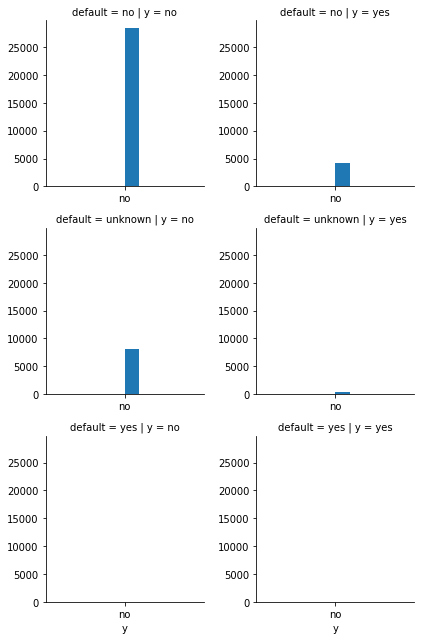

In [33]:
#Look at other customer information and how that relates to a purchase or not.
g=sns.FacetGrid(data, col="y", row="default")
g.map(plt.hist,"y")

plt.show()

In [138]:
default_grouped = data.groupby(["default","y"]).size()
default_plot = pd.DataFrame(columns=["Category","Conversion Rate"])
default_plot= default_plot.append({"Category":"No Defaults","Conversion Rate":default_grouped[1]/(default_grouped[0]+default_grouped[1])}, ignore_index=True)
default_plot= default_plot.append({"Category":"Unknown","Conversion Rate":default_grouped[3]/(default_grouped[2]+default_grouped[3])}, ignore_index=True)

In [215]:
previous_plot =pd.DataFrame()

In [229]:
previous_grouped = data.groupby(["Previous Contact","y"]).size()
previous_plot = pd.DataFrame(columns=["Category","Conversion Rate"])
previous_plot= previous_plot.append({"Category":"No","Conversion Rate":previous_grouped[0][1]/(previous_grouped[0][0]+previous_grouped[0][1])}, ignore_index=True)
previous_plot= previous_plot.append({"Category":"Yes","Conversion Rate":previous_grouped[3]/(previous_grouped[2]+previous_grouped[3])}, ignore_index=True)

In [230]:
previous_grouped

Previous Contact  y  
0                 no     36000
                  yes     3673
1                 no       548
                  yes      967
dtype: int64

In [231]:
previous_grouped[0][1]

3673

In [232]:
previous_plot

,Category,Conversion Rate
0,No,0.092582
1,Yes,0.638284


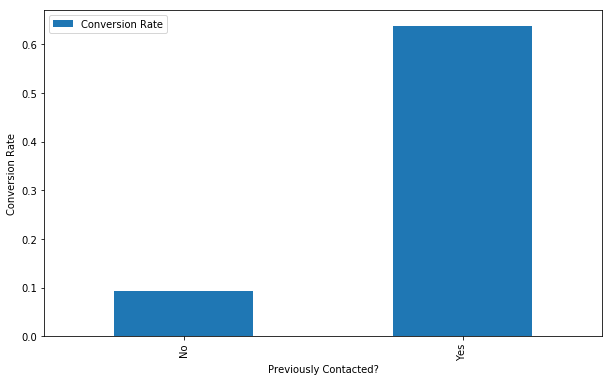

In [236]:
plot=previous_plot.plot(x="Category", y="Conversion Rate", kind="bar", figsize=(10,6))
plt.ylabel("Conversion Rate")
plt.xlabel("Previously Contacted?")
fig = plot.get_figure()
fig.savefig("output5.png")
plt.show()

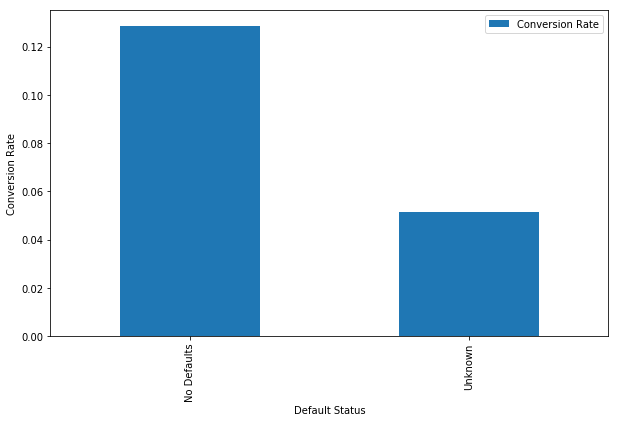

In [198]:
plot=default_plot.plot(x="Category", y="Conversion Rate", kind="bar", figsize=(10,6))
plt.ylabel("Conversion Rate")
plt.xlabel("Default Status")
fig = plot.get_figure()
fig.savefig("output3.png")
plt.show()

It looks like no customers with known defaults were contacted. And for those with an unknown default status the conversion rate was lower than for those with a confirmed no.  Let's confirm this with raw numbers.

In [20]:
default_data = data["default"]
default_data.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

The numbers confirm that there were only 3 customers with a known default, "yes", contacted during the campaign, clearly they are trying to avoid those customers.  Let's look at another categorical piece of information on the customers and how it impacts whether they make a purchase or not.

In [132]:
marital_grouped = data.groupby(["marital","y"]).size()
marital_plot = pd.DataFrame(columns=["Category","Conversion Rate"])
marital_plot= marital_plot.append({"Category":"Divorced","Conversion Rate":marital_grouped[1]/(marital_grouped[0]+marital_grouped[1])}, ignore_index=True)
marital_plot= marital_plot.append({"Category":"Married","Conversion Rate":marital_grouped[3]/(marital_grouped[2]+marital_grouped[3])}, ignore_index=True)
marital_plot= marital_plot.append({"Category":"Single","Conversion Rate":marital_grouped[5]/(marital_grouped[4]+marital_grouped[5])}, ignore_index=True)
marital_plot= marital_plot.append({"Category":"Unknown","Conversion Rate":marital_grouped[7]/(marital_grouped[6]+marital_grouped[7])}, ignore_index=True)

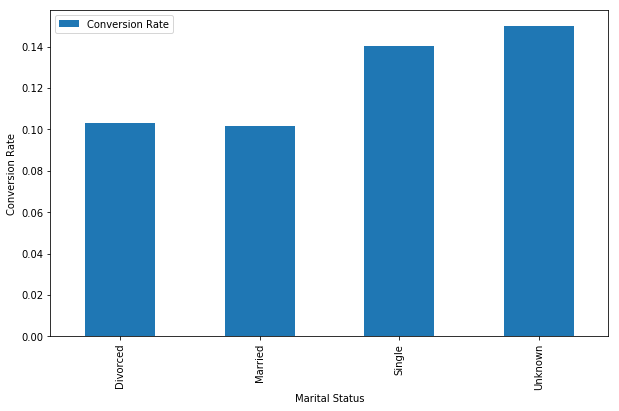

In [201]:
plot=marital_plot.plot(x="Category", y="Conversion Rate", kind="bar", figsize=(10,6))
plt.ylabel("Conversion Rate")
plt.xlabel("Marital Status")
fig = plot.get_figure()
fig.savefig("output4.png")
plt.show()

Interestingly it appears single and divorved customers have slightly higher conversion rates than married customers.  A quick Google search suggests that marriage rates in Portugal are quite low, and divorce rates unusually high.  It would be interesting to see the marital status for all customers of this bank.  Did they chose to contact more many more marriage customers, or is this just the natural balance of their customers.

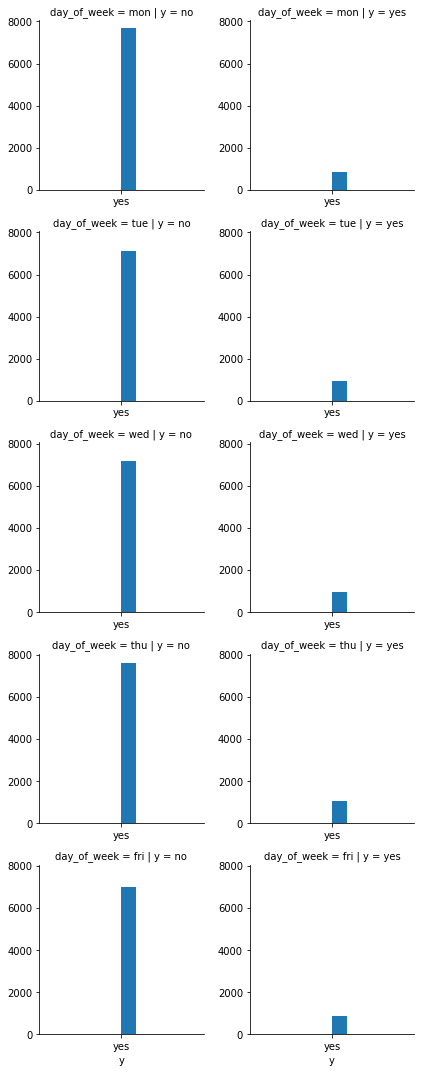

In [22]:
g=sns.FacetGrid(data, col="y", row="day_of_week")
g.map(plt.hist,"y")
plt.show()

It doesn't appear contacting the customer on a given day has any particular impact.  

In summary some features to watch during feature selection are the customers marital status, whether they have defaulted on a loan and whether they have been previously contacted for another campaign.